In [1]:
from JDE import time_series_fusion 
import JDE as jde
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from ripser import ripser
from persim import plot_diagrams

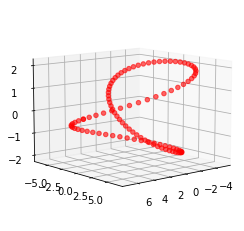

In [2]:
#Sample 100 points from the (1,2) torus curve with outer radius 5 and inner radius 1, starting at (0,0) 
#in param. space
N=100
T = jde.generate_torus_curve(N,5,2,1,2,0,0)
jde.visualize_embedding(T,['r']*100)

In [3]:
tsf = time_series_fusion(d=10)

Text(0.5, 1.0, 'SSM')

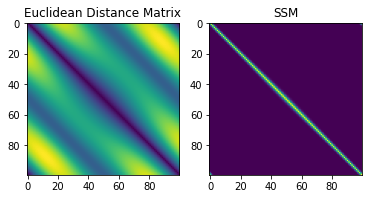

In [4]:
#Compute and plot the Euclidean distance matrix and self-similarity matrix (SSM) of the torus curve
#The parameters beta and kappa are used in constructing the SSM, see the paper
D = tsf.curve_to_dist(T)
S = tsf.dist_to_ssm(D)
fig, axes = plt.subplots(1,2)
axes[0].imshow(D)
axes[0].set_title("Euclidean Distance Matrix")
axes[1].imshow(S)
axes[1].set_title("SSM")

In [32]:
# Sample three random directions on the sphere, and three random basepoints in the cube [-1,1]^3
P=3
directions = jde.random_normalized_directions(P,3)
basepoints = jde.random_basepoints(P,-1,1,-1,1,-1,1)

#For each sphere direction, use dot products to project the torus curve to a 1d time series
proj_ts = [jde.curve_proj_ts(T,directions[i]) for i in range(P)]
#Compute the 1d Euclidean distance matrices of these time series
proj_dist_mats = []
for i in range(P):
    proj_dist_mats.append(tsf.curve_to_dist(proj_ts[i]))

#For each basepoint, use "distance to the basepoint" to project the torus curve to a 1d time series
basepoint_ts = [jde.curve_proj_ts(T,basepoints[i]) for i in range(P)]
#Compute the 1d Euclidean distance matrices of these time series
basepoint_dist_mats = []
for i in range(P):
    basepoint_dist_mats.append(tsf.curve_to_dist(basepoint_ts[i]))    
        

Fusing Projected Time Series


Text(0.5, 1.0, 'JDL Fusion')

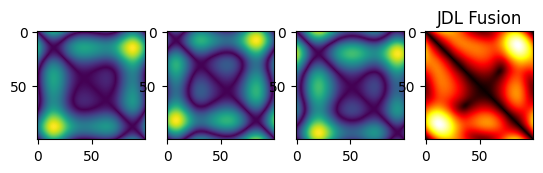

In [140]:
#Let's plot the Euclidean distance matrices of the three projected time series
fig, axes = plt.subplots(1,4)
print("Fusing Projected Time Series")
for i in range(3):
    axes[i].imshow(proj_dist_mats[i])
#Let's fuse them via JDL    
axes[3].imshow(tsf.JDL(proj_dist_mats),cmap='hot')   
axes[3].set_title("JDL Fusion")

Fusing 'Distance-to-Basepoint' Time Series


Text(0.5, 1.0, 'JDL Fusion')

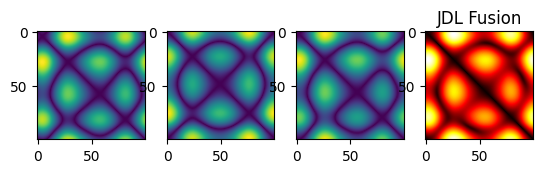

In [141]:
#Let's plot the Euclidean distance matrices of the three "distance to basepoint" time series
fig, axes = plt.subplots(1,4)
print("Fusing 'Distance-to-Basepoint' Time Series")
for i in range(3):
    axes[i].imshow(basepoint_dist_mats[i])
#Let's fuse them via JDL    
axes[3].imshow(tsf.JDL(basepoint_dist_mats),cmap='hot')    
axes[3].set_title("JDL Fusion")

Fusing Projected Time Series SSMs


Text(0.5, 1.0, 'SNF Fusion')

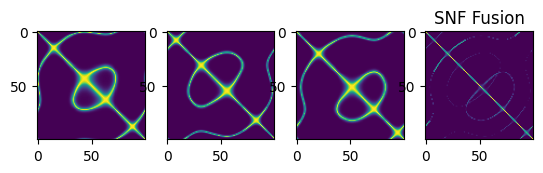

In [142]:
#We can turn these projected distance matrices into SSMs and fuse them via SNF
fig, axes = plt.subplots(1,4)
print("Fusing Projected Time Series SSMs")
for i in range(3):
    axes[i].imshow(tsf.dist_to_ssm(proj_dist_mats[i]))
axes[3].imshow(tsf.SNF(proj_dist_mats))
axes[3].set_title("SNF Fusion")

Fusing 'Distance-to-Basepoint' Time Series SSMs


Text(0.5, 1.0, 'SNF Fusion')

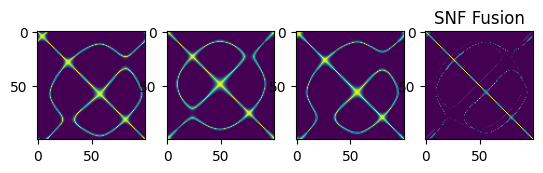

In [143]:
#We can turn these "distance-to-basepoint" distance matrices into SSMs and fuse them via SNF
fig, axes = plt.subplots(1,4)
print("Fusing 'Distance-to-Basepoint' Time Series SSMs")

for i in range(3):
    axes[i].imshow(tsf.dist_to_ssm(basepoint_dist_mats[i]))
axes[3].imshow(tsf.SNF(basepoint_dist_mats))
axes[3].set_title("SNF Fusion")

Takens-based methods for fusing projected time series


Text(0.5, 1.0, 'Gram-Schmidt + Takens')

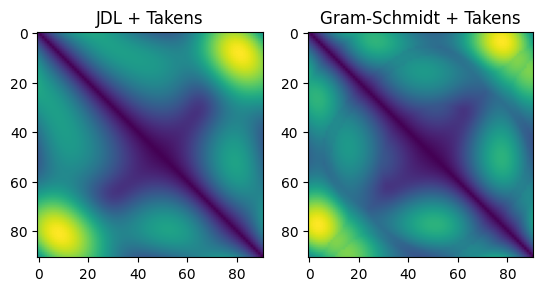

In [145]:
#Fuse using Takens, with and without Gram-Schmidt Tensor
print("Takens-based methods for fusing projected time series")
fusion_takens = tsf.takens_JDL(proj_ts,10)
fusion_GS = tsf.takens_GS(proj_ts,10)
fig, axes = plt.subplots(1,2)
axes[0].imshow(fusion_takens)
axes[0].set_title("JDL + Takens")
axes[1].imshow(fusion_GS)
axes[1].set_title("Gram-Schmidt + Takens")

Takens-based methods for fusing 'distance-to-basepoint' time series


Text(0.5, 1.0, 'Gram-Schmidt + Takens')

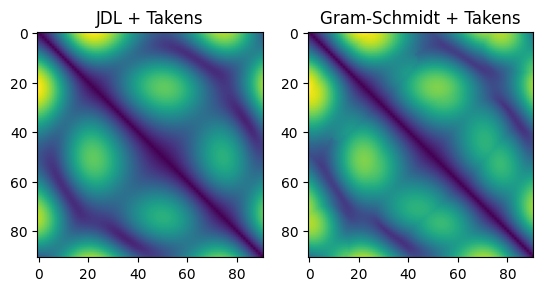

In [146]:
#Fuse using Takens, with and without Gram-Schmidt Tensor
print("Takens-based methods for fusing 'distance-to-basepoint' time series")
fusion_takens = tsf.takens_JDL(basepoint_ts,10)
fusion_GS = tsf.takens_GS(basepoint_ts,10)
fig, axes = plt.subplots(1,2)
axes[0].imshow(fusion_takens)
axes[0].set_title("JDL + Takens")
axes[1].imshow(fusion_GS)
axes[1].set_title("Gram-Schmidt + Takens")

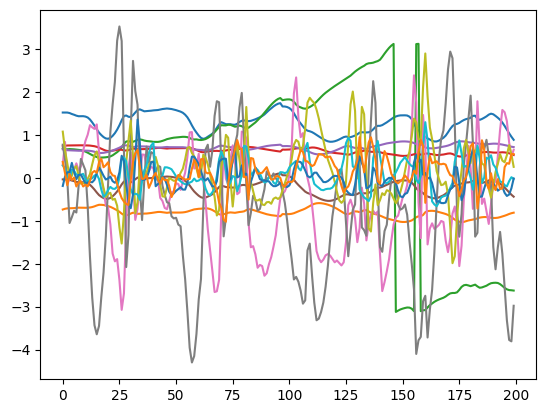

In [155]:
#Load some data from the Motionsense Data Set
file = 'dws_1'
jog_0 = np.transpose(jde.get_person_from_file(file,0))[:,:200]
for i in range(12):
    plt.plot(jog_0[i])

Text(0.5, 1.0, 'Takens + Gram-Schmidt')

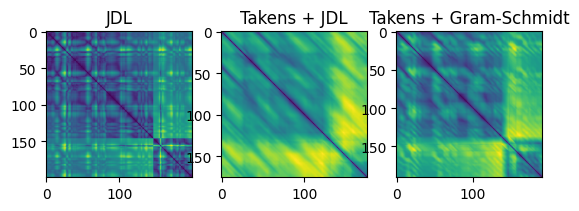

In [107]:
#Fuse using our three methods
fusion_jdl = tsf.takens_JDL(jog_0,1)
fusion_takens = tsf.takens_JDL(jog_0,25)
fusion_gs = tsf.takens_GS(jog_0,25)
fig, axes = plt.subplots(1,3)
axes[0].imshow(fusion_jdl)
axes[0].set_title("JDL")
axes[1].imshow(fusion_takens)
axes[1].set_title("Takens + JDL")
axes[2].imshow(fusion_jde)
axes[2].set_title("Takens + Gram-Schmidt")

C:\Users\Elchanan\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


Text(0.5, 0.92, 'MDS of JDL fusion')

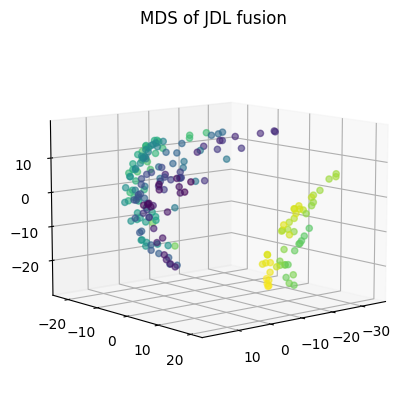

In [147]:
#Visualize using MDS the reconstructed JDL distance matrix
viridis = cm.get_cmap('viridis', len(fusion_jdl))
jde.visualize_MDS(fusion_jdl,viridis.colors)
plt.title("MDS of JDL fusion")

Persistence Diagram of JDL fusion


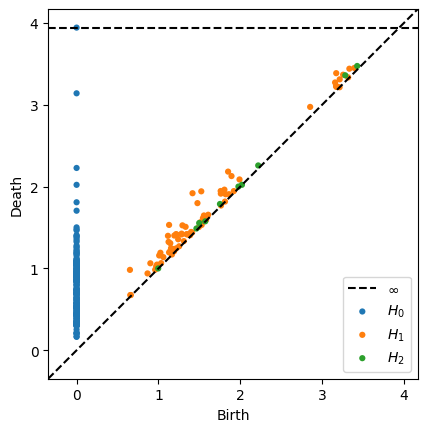

In [153]:
#Plot the JDL fusion matrix persistence diagram
print("Persistence Diagram of JDL fusion")
diagrams = ripser(fusion_jdl,distance_matrix = True,maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)

C:\Users\Elchanan\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


Text(0.5, 0.92, 'MDS of Takens + Gram-Schmidt fusion')

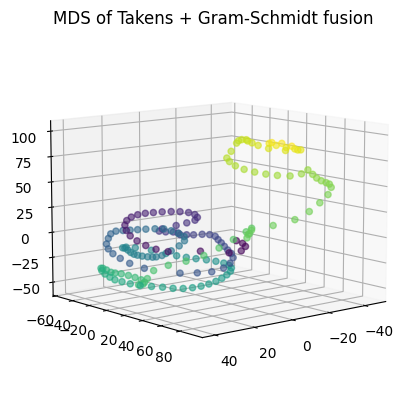

In [148]:
#Plot the Takens+Gram-Schmidt fusion matrix persistence diagram
viridis = cm.get_cmap('viridis', len(fusion_gs))
jde.visualize_MDS(fusion_gs,viridis.colors)
plt.title("MDS of Takens + Gram-Schmidt fusion")

Persistence Diagram of Takens + Gram-Schmidt fusion


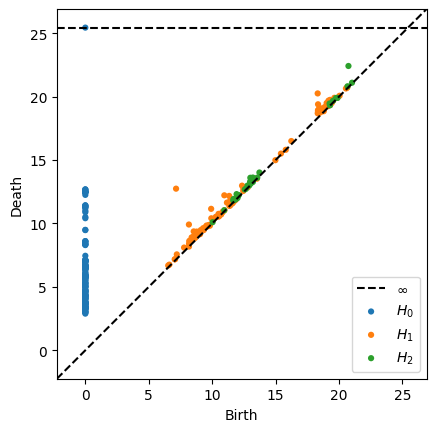

In [152]:
#Plot the Takens+Gram-Schmidt fusion matrix persistence diagram
print("Persistence Diagram of Takens + Gram-Schmidt fusion")
diagrams = ripser(fusion_gs,distance_matrix = True,maxdim=2)['dgms']
plot_diagrams(diagrams, show=True)